# **Social Media Engagement Analysis**

In this project I will analyze engagement behavior across social media platforms to uncover patterns that reflect customer preferences, campaign performance timing, and content strategies.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Import dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("divyaraj2006/social-media-engagement")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/social-media-engagement


In [3]:
# Check what files are inside the downloaded dataset
import os
print(os.listdir(path))

['social_media_engagement1.csv']


In [4]:
# Read csv file as DCSV file as DataFrame
df = pd.read_csv(os.path.join(path, "social_media_engagement1.csv"))
print(df.head())

   post_id   platform post_type        post_time  likes  comments  shares  \
0        1   Facebook     image  8/17/2023 14:45   2121       474     628   
1        2   Facebook  carousel   5/14/2023 0:45   3660       432     694   
2        3  Instagram      poll  2/21/2023 16:15   4955       408     688   
3        4    Twitter     image  11/16/2023 0:45   1183        90     187   
4        5    Twitter     video   5/23/2023 0:30   3499       247     286   

   post_day sentiment_score  
0  Thursday        positive  
1    Sunday         neutral  
2   Tuesday        negative  
3  Thursday        negative  
4   Tuesday        positive  


In [5]:
df.describe()

,post_id,likes,comments,shares
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,2381.810000,202.66000,415.650000
std,29.011492,1632.573284,138.84067,283.877601
min,1.000000,15.000000,10.00000,16.000000
25%,25.750000,895.750000,89.75000,183.000000
50%,50.500000,2220.000000,171.00000,356.500000
75%,75.250000,3593.250000,299.00000,689.500000
max,100.000000,5000.000000,500.00000,993.000000


In [6]:
df.shape

(100, 9)

In [7]:
# Check for Null values
df.isnull().sum()

,0
post_id,0
platform,0
post_type,0
post_time,0
likes,0
comments,0
shares,0
post_day,0
sentiment_score,0


Convert Datasets

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [9]:
df['post_time'] = pd.to_datetime(df['post_time'])
df['hour'] = df['post_time'].dt.hour
df['month'] = df['post_time'].dt.month
df['day_of_week'] = df['post_time'].dt.day_name()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          100 non-null    int64         
 1   platform         100 non-null    object        
 2   post_type        100 non-null    object        
 3   post_time        100 non-null    datetime64[ns]
 4   likes            100 non-null    int64         
 5   comments         100 non-null    int64         
 6   shares           100 non-null    int64         
 7   post_day         100 non-null    object        
 8   sentiment_score  100 non-null    object        
 9   hour             100 non-null    int32         
 10  month            100 non-null    int32         
 11  day_of_week      100 non-null    object        
dtypes: datetime64[ns](1), int32(2), int64(4), object(5)
memory usage: 8.7+ KB


In [11]:
# convert sentiment_score to numeric

# Map text labels to numbers (or categories)
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_num'] = df['sentiment_score'].map(sentiment_map)

# relabel for plotting
sentiment_label_map = {'positive': 'Positive', 'neutral': 'Neutral', 'negative': 'Negative'}
df['sentiment_label'] = df['sentiment_score'].map(sentiment_label_map)

In [12]:
print(df['sentiment_score'].unique()[:10])
print(df['sentiment_score'].dtype)

['positive' 'neutral' 'negative']
object


In [13]:
# Create total engagement mentric
df['total_engagement'] = df['likes'] + df['comments'] + df['shares']
df['engagement_rate'] = df['total_engagement'] / df['total_engagement'].max()

# **Exploratory Data Analysis (EDA)**

In [14]:
df.head(20)

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,hour,month,day_of_week,sentiment_num,sentiment_label,total_engagement,engagement_rate
0,1,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,14,8,Thursday,1,Positive,3223,0.502808
1,2,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,0,5,Sunday,0,Neutral,4786,0.746646
2,3,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,16,2,Tuesday,-1,Negative,6051,0.943994
3,4,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,0,11,Thursday,-1,Negative,1460,0.227769
4,5,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,0,5,Tuesday,1,Positive,4032,0.629017
5,6,Instagram,carousel,2023-05-05 20:00:00,256,186,211,Friday,neutral,20,5,Friday,0,Neutral,653,0.101872
6,7,Instagram,image,2023-02-26 11:45:00,1982,30,906,Sunday,positive,11,2,Sunday,1,Positive,2918,0.455226
7,8,Instagram,text,2023-10-28 19:30:00,1274,45,216,Saturday,neutral,19,10,Saturday,0,Neutral,1535,0.239470
8,9,Facebook,video,2023-05-02 06:15:00,317,249,221,Tuesday,neutral,6,5,Tuesday,0,Neutral,787,0.122777
9,10,Twitter,carousel,2023-05-11 11:00:00,1878,225,438,Thursday,neutral,11,5,Thursday,0,Neutral,2541,0.396412


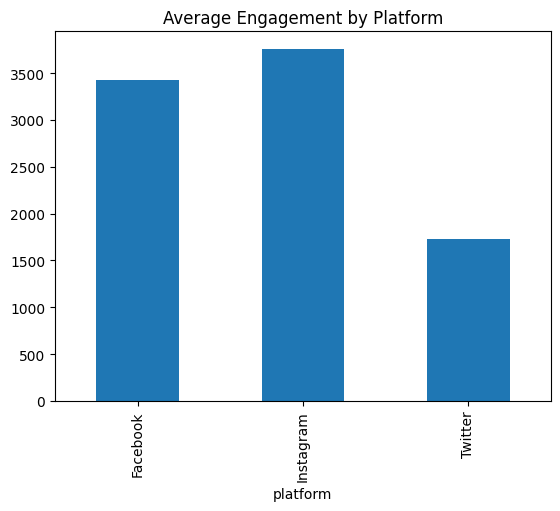

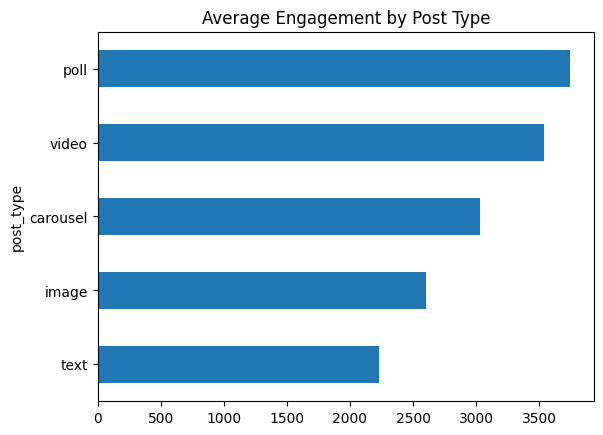

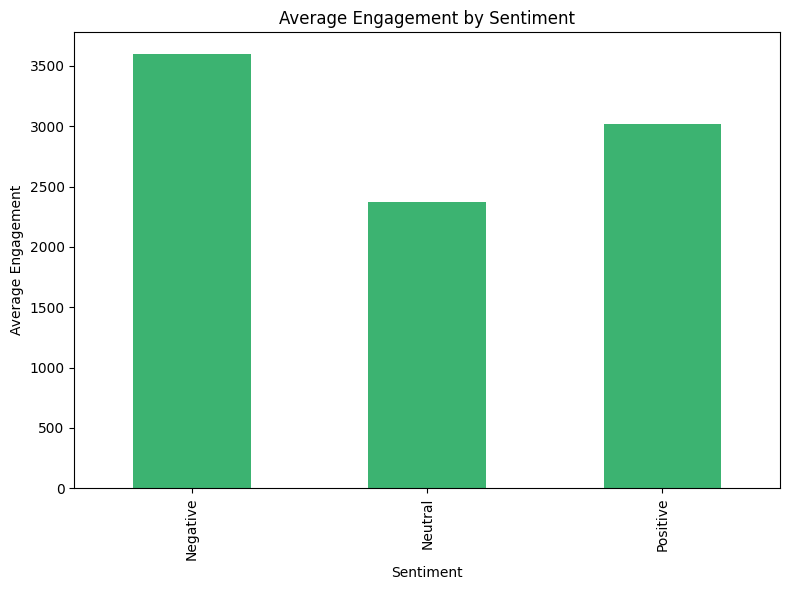

In [15]:
# Average engagement by platform
df.groupby('platform')['total_engagement'].mean().plot(kind='bar')
plt.title('Average Engagement by Platform')
plt.show()

# Engagement by post type
df.groupby('post_type')['total_engagement'].mean().sort_values().plot(kind='barh')
plt.title('Average Engagement by Post Type')
plt.show()

# Sentiment vs engagement (categorical binning recommended)
avg_engagement = df.groupby('sentiment_label')['total_engagement'].mean()
plt.figure(figsize=(8, 6))
avg_engagement.plot(kind='bar', color='mediumseagreen')
plt.title('Average Engagement by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Engagement')
plt.tight_layout()
plt.show()

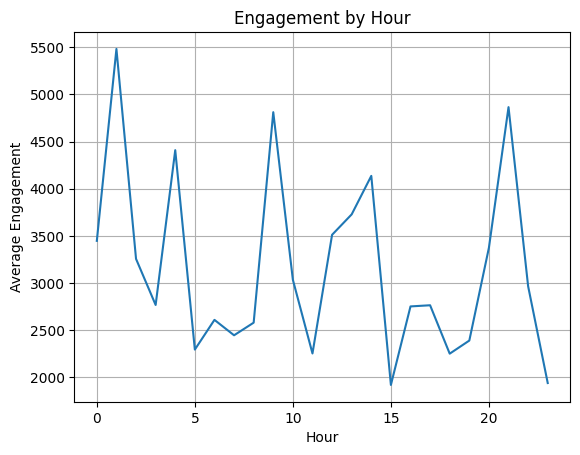

In [16]:
# Feature engineering
df['is_weekend'] = df['post_day'].isin(['Saturday', 'Sunday'])
df['like_to_comment_ratio'] = df['likes'] / (df['comments'] + 1)
df['high_engagement'] = df['total_engagement'] > df['total_engagement'].quantile(0.9)

# Time features
df['time_of_day'] = df['post_time'].dt.hour
df['day_of_week'] = df['post_time'].dt.day_name()
df['month'] = df['post_time'].dt.month

# Engagement by hour
df.groupby('hour')['total_engagement'].mean().plot(kind='line')
plt.title('Engagement by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Engagement')
plt.grid(True)
plt.show()

# **Visualizations**

**Key Questions to Focus on:**

1.   Which types of content formats show the highest interaction levels?
2.   How does engagement vary across digital platforms?
3.   Are there optimal times or days to publish for maximum customer engagement?
4.   Do high-performing posts (top 10%) share common features?

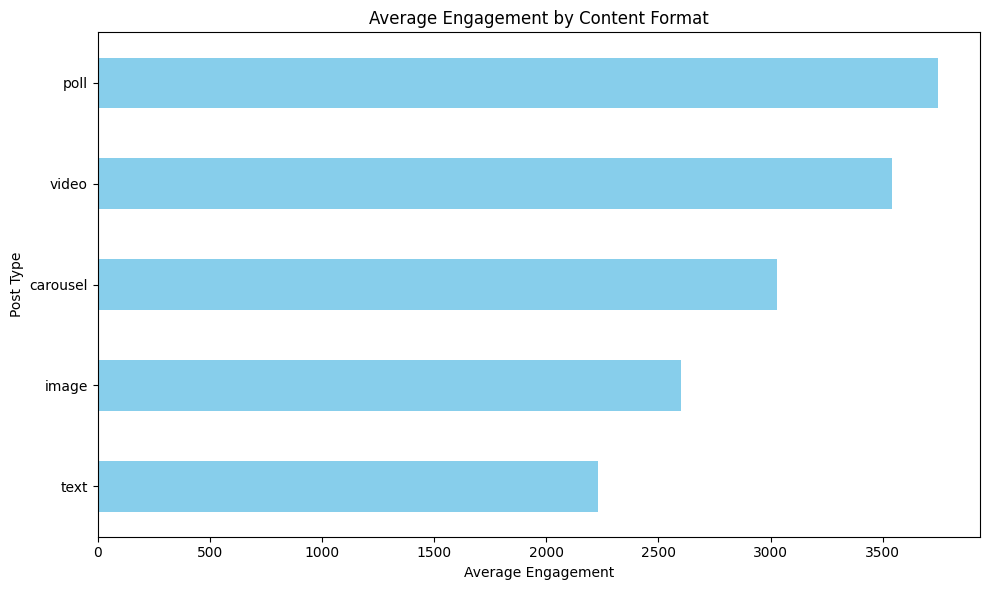

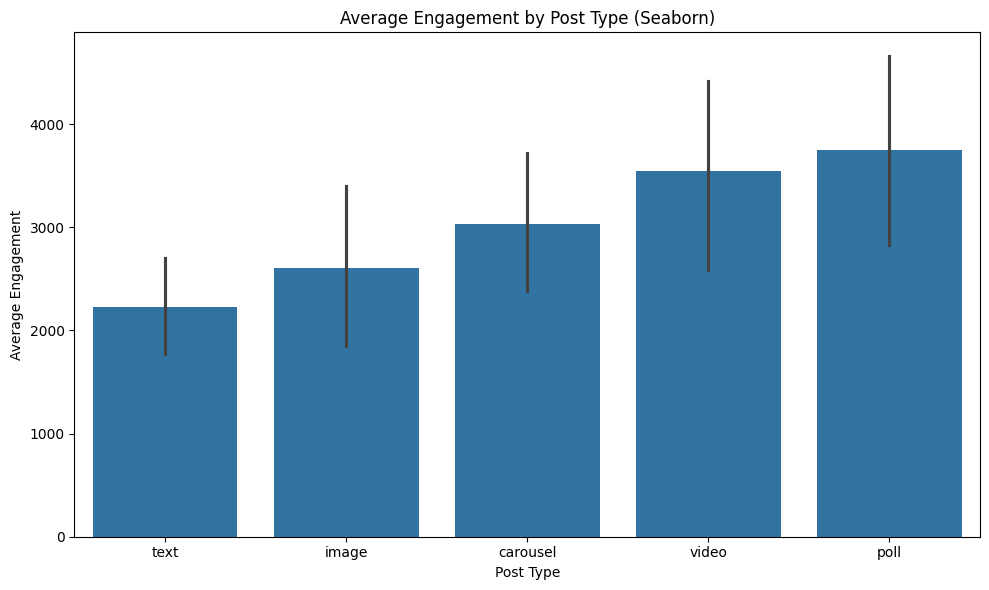

In [17]:
# Which types of content formats show the highest interaction levels?

# Compute average engagement by post type
avg_engagement_by_type = df.groupby('post_type')['total_engagement'].mean().sort_values()

# Plot 1: Horizontal bar chart using matplotlib
plt.figure(figsize=(10, 6))
avg_engagement_by_type.plot(kind='barh', color='skyblue')
plt.title('Average Engagement by Content Format')
plt.xlabel('Average Engagement')
plt.ylabel('Post Type')
plt.tight_layout()
plt.show()

# Plot 2: Seaborn barplot with raw data (optional, but cleaner with order)
plt.figure(figsize=(10, 6))
order = avg_engagement_by_type.index  # sort order for consistency
sns.barplot(x='post_type', y='total_engagement', data=df, order=order)
plt.title('Average Engagement by Post Type (Seaborn)')
plt.xlabel('Post Type')
plt.ylabel('Average Engagement')
plt.tight_layout()
plt.show()

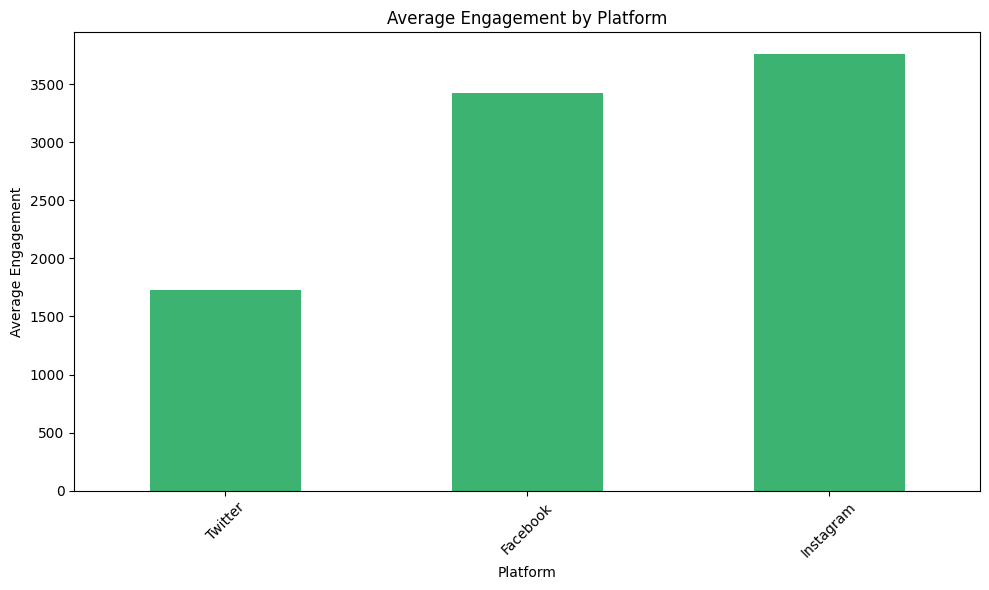

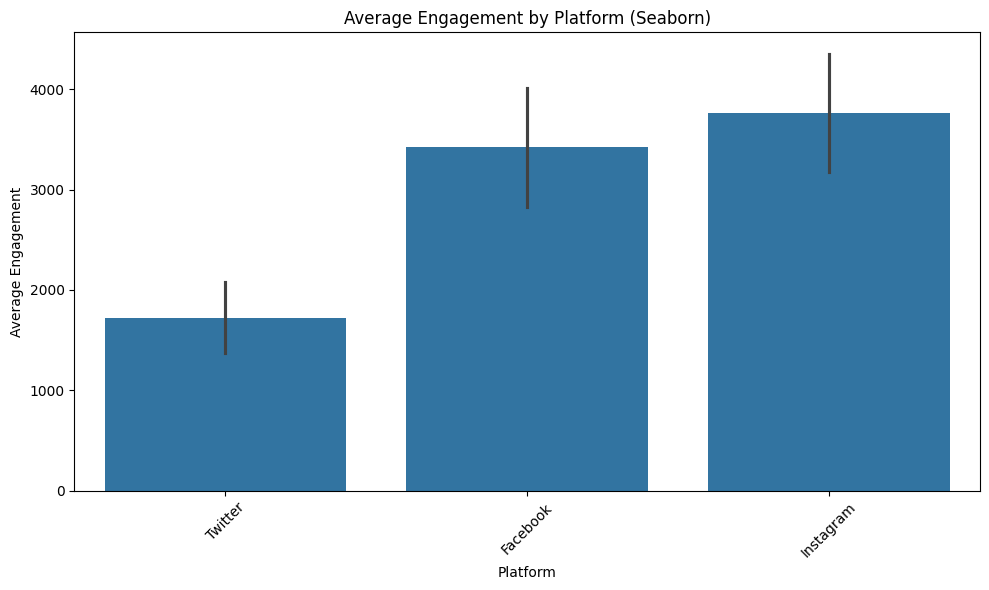

In [18]:
# How does engagement vary across digital platforms?

# Calculate average engagement by platform
avg_engagement_by_platform = df.groupby('platform')['total_engagement'].mean().sort_values()

# Plot 1: Matplotlib bar chart (sorted for clarity)
plt.figure(figsize=(10, 6))
avg_engagement_by_platform.plot(kind='bar', color='mediumseagreen')
plt.title('Average Engagement by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Seaborn barplot (sorted to match above)
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='total_engagement', data=df, order=avg_engagement_by_platform.index)
plt.title('Average Engagement by Platform (Seaborn)')
plt.xlabel('Platform')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

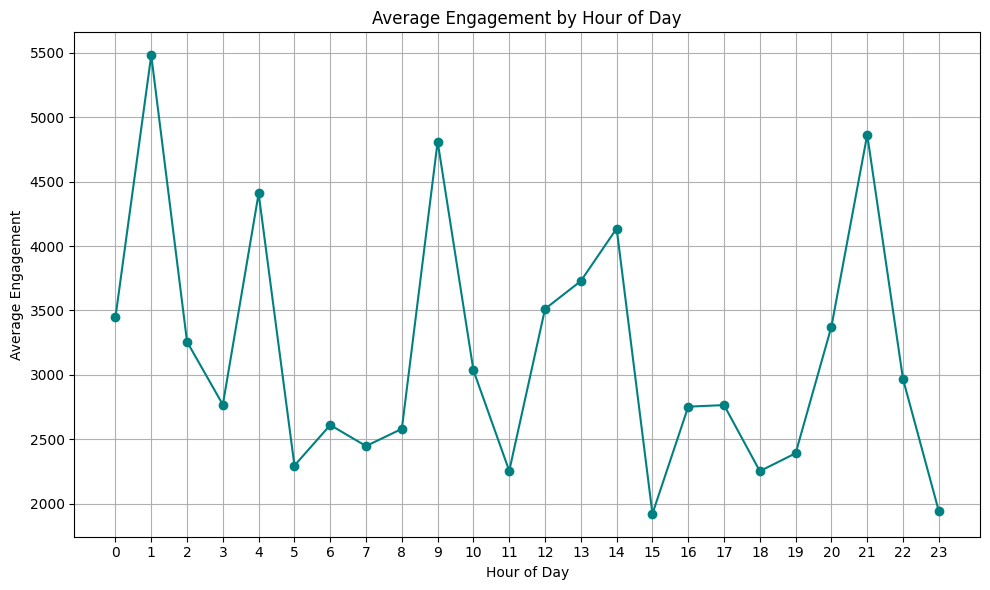

/tmp/ipython-input-19-3906143676.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='total_engagement', data=df, estimator='mean', ci=None)


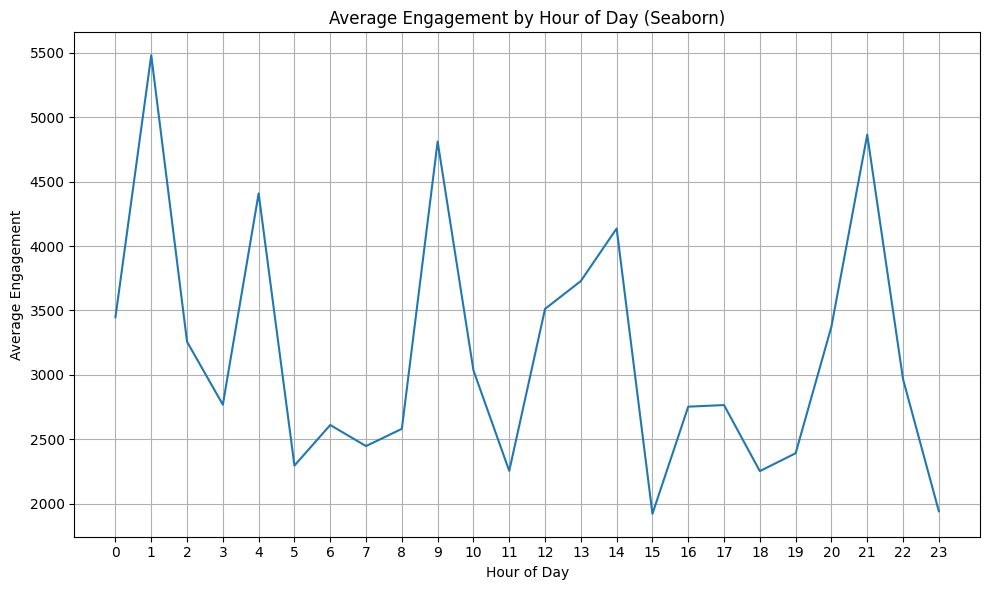

In [19]:
# Are there optimal times or days to publish for maximum customer engagement?

# Calculate average engagement by posting hour
avg_engagement_by_hour = df.groupby('hour')['total_engagement'].mean()

# Plot 1: Matplotlib line plot
plt.figure(figsize=(10, 6))
avg_engagement_by_hour.plot(kind='line', marker='o', color='teal')
plt.title('Average Engagement by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.tight_layout()
plt.show()

# Plot 2: Seaborn lineplot using raw data
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='total_engagement', data=df, estimator='mean', ci=None)
plt.title('Average Engagement by Hour of Day (Seaborn)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

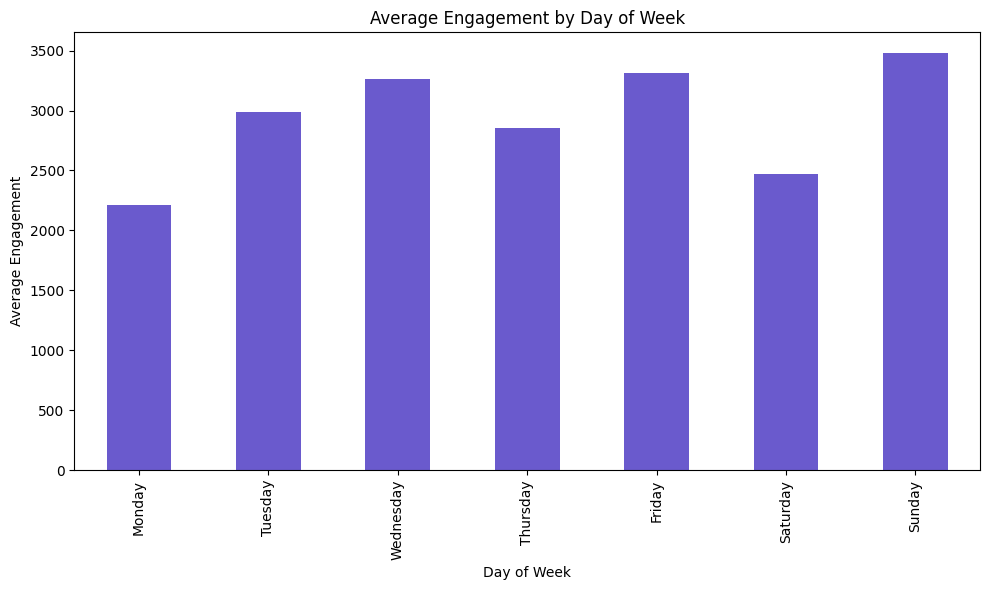

In [20]:
# Calculate average engagement by day
avg_engagement_by_day = df.groupby('day_of_week')['total_engagement'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot: Engagement by Day of Week
plt.figure(figsize=(10, 6))
avg_engagement_by_day.plot(kind='bar', color='slateblue')
plt.title('Average Engagement by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement')
plt.tight_layout()
plt.show()

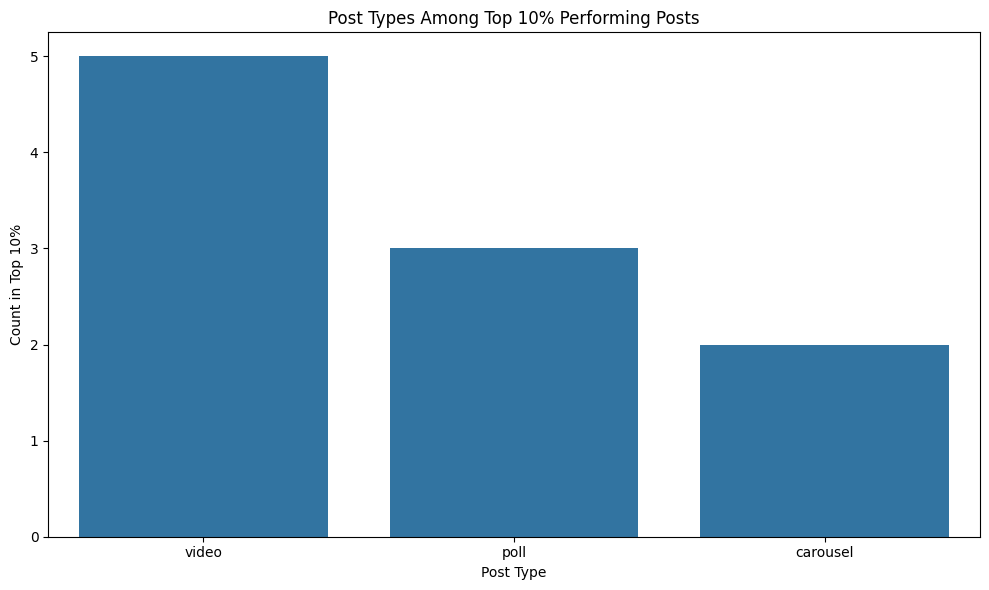

In [21]:
# Do high-performing posts (top 10%) share common features?

# Step 1: Define top 10% high-performing posts
threshold = df['total_engagement'].quantile(0.9)
high_performers = df[df['total_engagement'] > threshold]

# Step 2: Compare feature distributions between high and normal posts (optional)
df['high_performer'] = df['total_engagement'] > threshold

# Step 3: Plot post types among top 10% posts
plt.figure(figsize=(10, 6))
sns.countplot(x='post_type', data=high_performers, order=high_performers['post_type'].value_counts().index)
plt.title('Post Types Among Top 10% Performing Posts')
plt.xlabel('Post Type')
plt.ylabel('Count in Top 10%')
plt.tight_layout()
plt.show()

# **Predictive Modeling**

In [35]:
df.describe()

,post_id,post_time,likes,comments,shares,hour,month,sentiment_num,total_engagement,engagement_rate,like_to_comment_ratio,high_engagement,time_of_day,platform_encoded,post_type_encoded,sentiment_score_encoded,sentiment_encoded
count,100.000000,100,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,2023-06-26 12:04:57,2381.810000,202.66000,415.650000,11.020000,6.390000,0.190000,3000.120000,0.468037,22.626687,0.100000,11.020000,1.00000,1.980000,1.190000,1.190000
min,1.000000,2023-01-01 06:00:00,15.000000,10.00000,16.000000,0.000000,1.000000,-1.000000,435.000000,0.067863,0.122034,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25.750000,2023-04-09 16:48:45,895.750000,89.75000,183.000000,5.000000,4.000000,-1.000000,1497.250000,0.233580,4.533929,0.000000,5.000000,0.00000,0.000000,0.000000,0.000000
50%,50.500000,2023-06-13 18:22:30,2220.000000,171.00000,356.500000,11.000000,6.000000,0.000000,2612.500000,0.407566,12.318630,0.000000,11.000000,1.00000,2.000000,1.000000,1.000000
75%,75.250000,2023-10-02 15:03:45,3593.250000,299.00000,689.500000,17.000000,10.000000,1.000000,4408.250000,0.687715,23.245222,0.000000,17.000000,2.00000,3.000000,2.000000,2.000000
max,100.000000,2023-12-31 22:30:00,5000.000000,500.00000,993.000000,23.000000,12.000000,1.000000,6410.000000,1.000000,261.090909,1.000000,23.000000,2.00000,4.000000,2.000000,2.000000
std,29.011492,NaN,1632.573284,138.84067,283.877601,7.072468,3.510144,0.837203,1773.559574,0.276686,39.171455,0.301511,7.072468,0.80403,1.537281,0.837203,0.837203


In [38]:
# Save csv to local
df.to_csv("social_media_engagement_updated.csv", index=False)